# Training a Digit Classifier

I am going to walk through the book and write every piece of code myself

In [2]:
import fastai.vision.all as vis
import matplotlib

matplotlib.rc('image', cmap='Greys') # no clue what this does

In [3]:
vis.URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [4]:
path = vis.untar_data(vis.URLs.MNIST_SAMPLE)

In [5]:
vis.Path.BASE_PATH = path # not sure what this does

In [6]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [7]:
%ls

00_plan_for_course.ipynb   04_nlp.ipynb
01_intro.ipynb             test.py
03_gradient_descent.ipynb


In [8]:
(path/'../../..').ls()

(#88) [Path('../../../.quokka'),Path('../../../.fastlane'),Path('../../../.sentryclirc'),Path('../../../.config'),Path('../../../Music'),Path('../../../.fig'),Path('../../../.serverlessrc'),Path('../../../.fig.dotfiles.bak'),Path('../../../.yarn'),Path('../../../.expo')...]

In [9]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [10]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [11]:
im3_path = threes[1]
im3 = vis.Image.open(im3_path)
im3

In [12]:
import numpy as np

np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [14]:
im3_t = tensor(im3)

In [15]:
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


How could a computer determine which ones are 3s and which ones are 7s?

We have a 2x2 array of numbers for each only representing a 3 or 7

So yeah you could do averages and that would probably do good enough for 3 or 7

You could take the average value of each square then subtract the difference between the average number and the one you are inspecting. Then see if you have a higher loss between 3 or 7



In [16]:
seven_tensors = [tensor(vis.Image.open(o)) for o in sevens]
three_tensors = [tensor(vis.Image.open(o)) for o in threes]

In [17]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [18]:
three_tensors[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [19]:
seven_tensors[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

<Axes: >

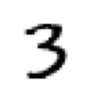

In [20]:
show_image(three_tensors[1])

Combines them into a single 3d tensor

In [21]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [22]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [23]:
stacked_threes[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0

<Axes: >

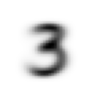

In [24]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

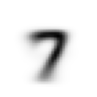

In [25]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

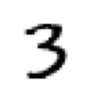

In [26]:
a_3 = stacked_threes[1]
show_image(a_3)

In [27]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

In [28]:
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [29]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [30]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

l1 - refers to standard mathmatical jargon for mean absolute value 

L1 norm vs Mean squared error
MSE punishes bigger mistakes more heavily because its doing a square



In [31]:
a_3.type()

'torch.FloatTensor'

In [32]:
valid_3_tens = torch.stack([tensor(vis.Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(vis.Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [33]:
# Here we do the -1 and -2 to get the mean of the whole image
# We do it like this so it works with arbitrary tensor ranks
# We will always be doing the last two dimensions
# So we can pass in a rank 3 tensor and get a rank 1 tensor back (list)
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3)
mnist_distance(stacked_threes, mean3)

tensor([0.1074, 0.1114, 0.1100,  ..., 0.1316, 0.1220, 0.1267])

In [34]:
mnist_distance(stacked_threes[0], mean7)

tensor(0.1441)

<Axes: >

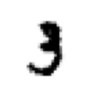

In [35]:
show_image(stacked_threes[0])

<Axes: >

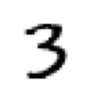

In [36]:
show_image(stacked_threes[1])

In [37]:
# Here the -1 and -2 mean the last and second to last dimensions
# So with a 3d tensor this means 
a_3.mean((-1, -2))


tensor(0.1424)

In [38]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

is_3(a_3), is_3(mean3)

(tensor(True), tensor(True))

In [39]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [40]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

In [41]:
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

I feel like I am understanding it so much bettor by writing out each step.

Calculating Gradients

SLOPE = GRADIENT

Pytorch will calculate the value of the derivative at that point. 

WE calculate the derivative for each weight treating all the others as constant

In [42]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [43]:
torch.randn(3)

tensor([0.3367, 0.1288, 0.2345])

In [44]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

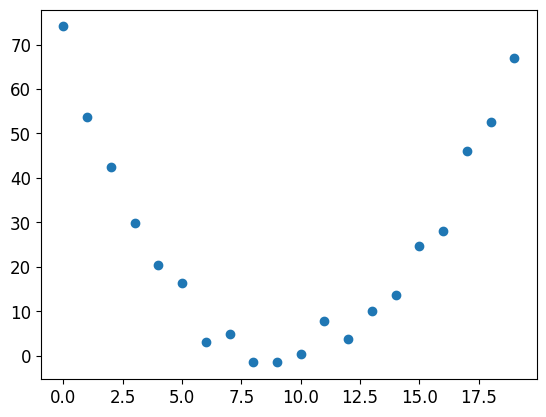

In [45]:
plt.scatter(time, speed)

In [46]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

In [47]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [48]:
params = torch.randn(3).requires_grad_()

In [49]:
params

tensor([ 0.2303, -0.3278,  0.7950], requires_grad=True)

In [50]:
orig_params = params.clone()
orig_params

tensor([ 0.2303, -0.3278,  0.7950], grad_fn=<CloneBackward0>)

In [51]:
preds = f(time, params)
preds

tensor([ 0.7950,  0.6975,  1.0608,  1.8847,  3.1693,  4.9145,  7.1204,  9.7870, 12.9142, 16.5021, 20.5507, 25.0599, 30.0298, 35.4604, 41.3516, 47.7035, 54.5161, 61.7893, 69.5232, 77.7178],
       grad_fn=<AddBackward0>)

In [52]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

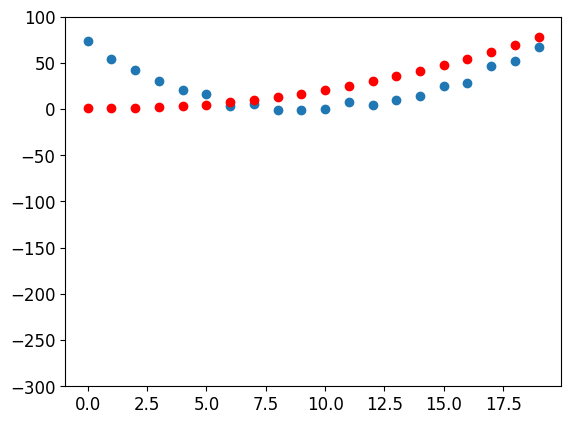

In [53]:
show_preds(preds)

In [54]:
loss = mse(preds, speed)

In [55]:
loss

tensor(817.4172, grad_fn=<MeanBackward0>)

Calculate the gradients

In [56]:
loss.backward()

In [57]:
params.grad

tensor([4.5169e+03, 2.9541e+02, 2.5931e+00])

Adjust the predictions by the gradients times the learning rate

In [58]:
lr = 1e-5

In [59]:
adjustment = params.grad * lr
adjustment

tensor([4.5169e-02, 2.9541e-03, 2.5931e-05])

I think this is incorrect because its going to be keeping track if we do it like this for the gradient

In [60]:
# params = params - adjustment

This is the correct way

In [61]:
params.data -= lr * params.grad.data
params.grad = None # zero out the gradient so it doesn't add up

The params are now a bit closer. This was them before:
tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [62]:
params

tensor([ 0.1852, -0.3307,  0.7949], requires_grad=True)

In [63]:
orig_params

tensor([ 0.2303, -0.3278,  0.7950], grad_fn=<CloneBackward0>)

Make new predictions

We went from over 25000 to now just 5000

In [64]:
preds = f(time, params)
mse(preds, speed)

tensor(670.3992, grad_fn=<MeanBackward0>)

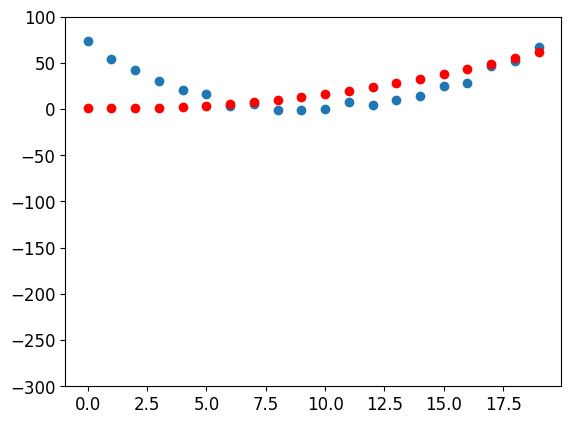

In [65]:
show_preds(preds)

Creating a function to repeat this process

In [66]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [67]:
for i in range(10): apply_step(params)

670.3992309570312
642.5762939453125
637.3087158203125
636.3092041015625
636.117431640625
636.0784912109375
636.0684814453125
636.0640258789062
636.0604248046875
636.05712890625


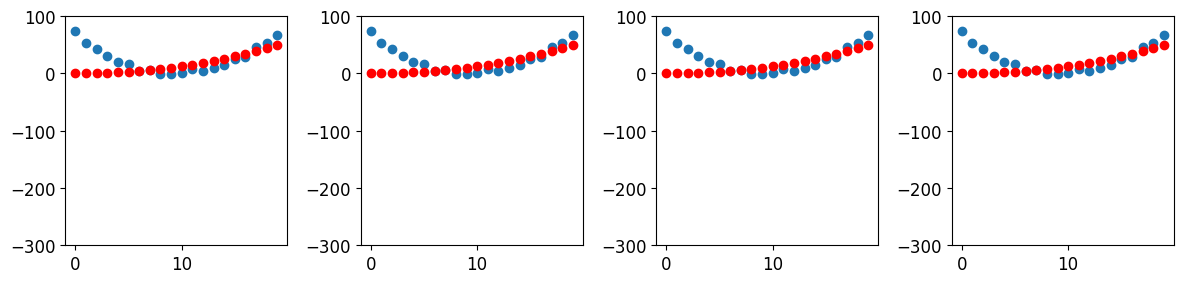

In [68]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

We need to change our input variable X into a list of rank 1 tensors. We use View and pass -1 which means make the axis as big as neccessary to fit all the data

In [69]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [70]:
train_x.shape

torch.Size([12396, 784])

Lets create our labels for each image

In [71]:
tensor([1]*len(threes) + [0]*len(sevens))

tensor([1, 1, 1,  ..., 0, 0, 0])

Unsqueeze seems to be like the opposite of view. its stretching the list of 1s or 0s into a rank 2 tensor 

In [72]:
tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [73]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [74]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [75]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [76]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [77]:
weights = init_params((28*28, 1))

In [78]:
weights

tensor([[-9.1382e-01],
        [-6.5814e-01],
        [ 7.8024e-02],
        [ 5.2581e-01],
        [-4.8799e-01],
        [ 1.1914e+00],
        [-8.1401e-01],
        [-7.3599e-01],
        [-1.4032e+00],
        [ 3.6004e-02],
        [-6.3477e-02],
        [ 6.7561e-01],
        [-9.7807e-02],
        [ 1.8446e+00],
        [-1.1845e+00],
        [ 1.3835e+00],
        [ 1.4451e+00],
        [ 8.5641e-01],
        [ 2.2181e+00],
        [ 5.2317e-01],
        [ 3.4665e-01],
        [-1.9733e-01],
        [-1.0546e+00],
        [ 1.2780e+00],
        [-1.7219e-01],
        [ 5.2379e-01],
        [ 5.6622e-02],
        [ 4.2630e-01],
        [ 5.7501e-01],
        [-6.4172e-01],
        [-2.2064e+00],
        [-7.5080e-01],
        [ 1.0868e-02],
        [-3.3874e-01],
        [-1.3407e+00],
        [-5.8537e-01],
        [ 5.3619e-01],
        [ 5.2462e-01],
        [ 1.1412e+00],
        [ 5.1644e-02],
        [ 7.4395e-01],
        [-4.8158e-01],
        [-1.0495e+00],
        [ 6

In [79]:
bias = init_params(1)

In [80]:
(train_x[0]*weights.T).sum() + bias

tensor([8.4957], grad_fn=<AddBackward0>)

In [81]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 8.4957],
        [13.4714],
        [ 8.0717],
        ...,
        [ 6.3964],
        [ 2.9858],
        [-0.0811]], grad_fn=<AddBackward0>)

In [82]:
train_x.shape, weights.shape

(torch.Size([12396, 784]), torch.Size([784, 1]))

In [83]:
corrects = (preds>0.0).float() == train_y

In [84]:
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [ True]])

In [85]:
corrects.float().mean().item()

0.5440464615821838

In [86]:
with torch.no_grad(): weights[0] *= 1.0001

In [87]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5440464615821838

Accuracy is the number that represents how accurate we are based on which predictions are actually correct. We cant use it as a loss function because its not continuous. The gradient will be 0 almost anywhere because increasing one weight by a little bit in either direction wont be likely to change the value of whether the prediction is right or not

In [88]:
def mnist_loss(predictions, targets): 
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [89]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [90]:
result = torch.where(trgts==1, 1-prds, prds)

result

tensor([0.1000, 0.4000, 0.8000])

In [91]:
mnist_loss(prds, trgts)

tensor(0.4333)

A sigmoid function makes sure an output is always between 1 & 0

In [92]:
def sigmoid(x): return 1/(1+torch.exp(-x))

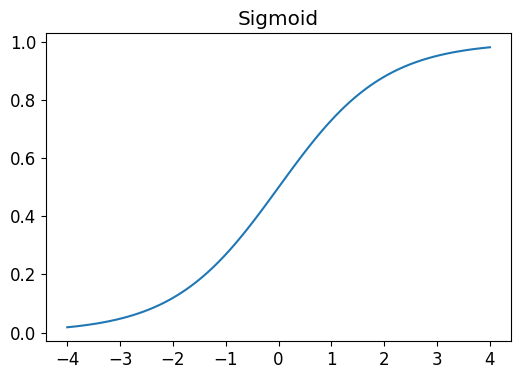

In [93]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [94]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [95]:
L(enumerate(string.ascii_lowercase))

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [96]:
weights = init_params((28*28,1))
weights

tensor([[-3.4888e-01],
        [-4.5792e-01],
        [-1.2322e+00],
        [-5.9808e-01],
        [-1.3493e-01],
        [ 1.4877e-01],
        [-2.3777e-01],
        [-1.0139e-01],
        [ 4.8813e-01],
        [ 1.0082e+00],
        [-5.9500e-01],
        [ 3.9263e-01],
        [-1.4314e+00],
        [-3.9799e-02],
        [-5.0034e-01],
        [ 2.9304e-01],
        [-2.0005e-01],
        [ 9.9495e-01],
        [ 7.2019e-01],
        [-1.3413e-01],
        [-1.6446e-01],
        [ 1.3389e+00],
        [ 2.0047e+00],
        [-1.5808e+00],
        [-1.5693e-01],
        [ 1.1383e+00],
        [-2.5052e-01],
        [ 1.6705e+00],
        [ 1.8888e+00],
        [-7.5381e-01],
        [-1.7143e+00],
        [-2.2070e+00],
        [ 3.6579e-01],
        [-3.9920e-01],
        [ 4.9674e-01],
        [-2.3692e+00],
        [-2.7667e-01],
        [-3.3858e-01],
        [-8.8103e-01],
        [ 3.4835e-01],
        [-1.1756e+00],
        [-7.8323e-02],
        [-9.7058e-01],
        [ 1

In [97]:
bias = init_params(1)

In [98]:
dl = DataLoader(dset, batch_size=256)

In [99]:
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [100]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [101]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [102]:
preds = linear1(batch)
preds

tensor([[-16.7332],
        [ -8.2922],
        [-12.0387],
        [-21.9669]], grad_fn=<AddBackward0>)

In [103]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9999, grad_fn=<MeanBackward0>)

In [104]:
loss.backward()

In [105]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [106]:
calc_grad(batch, train_y[:4], linear1)

In [107]:
weights.grad.mean(), bias.grad

(tensor(-1.8249e-05), tensor([-0.0001]))

In [108]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-2.7373e-05), tensor([-0.0002]))

In place 

In [109]:
weights.grad.zero_()
bias.grad.zero_();

In [110]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [111]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [112]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [113]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [114]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [115]:
validate_epoch(linear1)

0.5649

In [116]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8496

In [117]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9209 0.9409 0.9496 0.957 0.9599 0.9619 0.9643 0.9653 0.9667 0.9677 0.9702 0.9711 0.9731 0.9736 0.9741 0.975 0.975 0.975 0.975 0.976 

In [118]:
linear_model = nn.Linear(28*28,1)

In [119]:
w,b = linear_model.parameters()

In [120]:
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [121]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [122]:
opt = BasicOptim(linear_model.parameters(), lr)

In [123]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [124]:
validate_epoch(linear_model)

0.4606

In [125]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [126]:
train_model(linear_model, 20)

0.4932 0.7686 0.8554 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.977 0.9775 0.9775 0.978 0.9785 

In [127]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8496 0.914 0.9346 0.9482 0.957 0.9619 0.9658 0.9673 0.9692 0.9712 0.9741 0.9751 0.9761 0.9775 0.9775 0.978 0.9785 0.979 

In [128]:
dls = DataLoaders(dl, valid_dl)

In [129]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [130]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


In [131]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [132]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [133]:
w1.shape, w2.shape

(torch.Size([784, 30]), torch.Size([30, 1]))

In [134]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [135]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [136]:
#hide_output
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.357809,0.395824,0.511286,00:00
1,0.163861,0.247912,0.781158,00:00
2,0.088579,0.120991,0.911187,00:00
3,0.056597,0.079901,0.939647,00:00
4,0.041966,0.061844,0.956330,00:00
5,0.034643,0.051889,0.962218,00:00
6,0.030529,0.045669,0.965162,00:00
7,0.027908,0.041440,0.967125,00:00
8,0.026046,0.038380,0.968106,00:00
9,0.024618,0.036053,0.969578,00:00


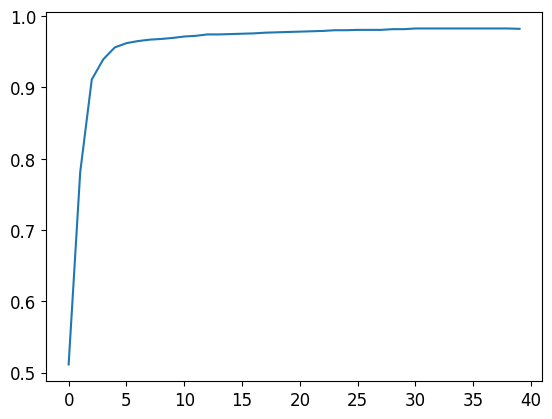

In [137]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [138]:
learn.recorder.values[-1][2]

0.98233562707901

In [139]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.100361,0.022341,0.995584,00:34
